In [1]:
#Masket Basket Analysis - Groceries data set

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori

In [3]:
data = pd.read_csv(r'C:\Users\Chethan\Downloads\Groceries_dataset.csv')

In [4]:
#step 1: Data exploration and pre-processsing
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
#checking rows and columns present in the dataset
data.shape

(38765, 3)

In [6]:
#checking missing values in the dataset for preprocessing
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#date converting object to Datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [8]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [9]:
#checking columns
data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [10]:
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [11]:
#===========================================================================================================

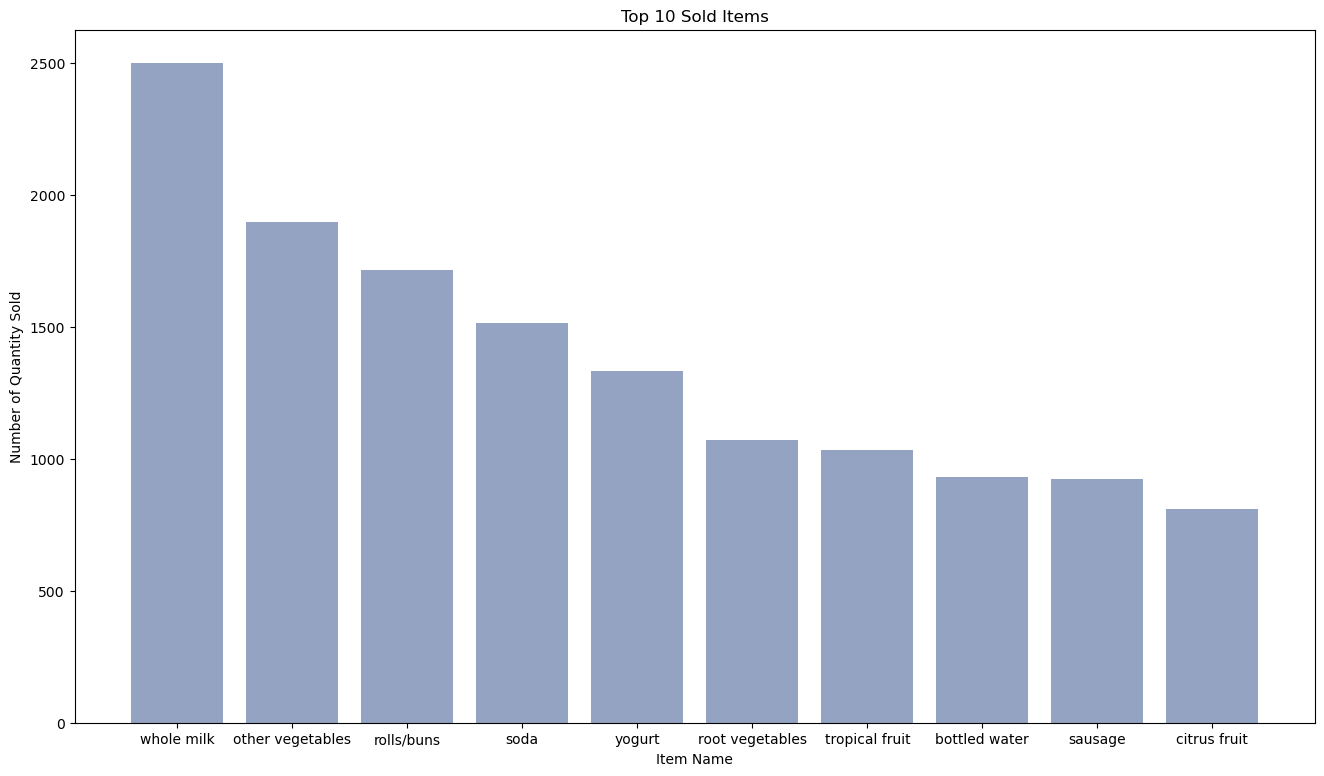

In [12]:
#step 2.Performing EDA

#2.1:Creating distribution for sold Items
## Declaring variables
Item_distr = data.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [13]:
#2.2: Creating Items sold monthly
data_date = data.set_index(['Date'])
data_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


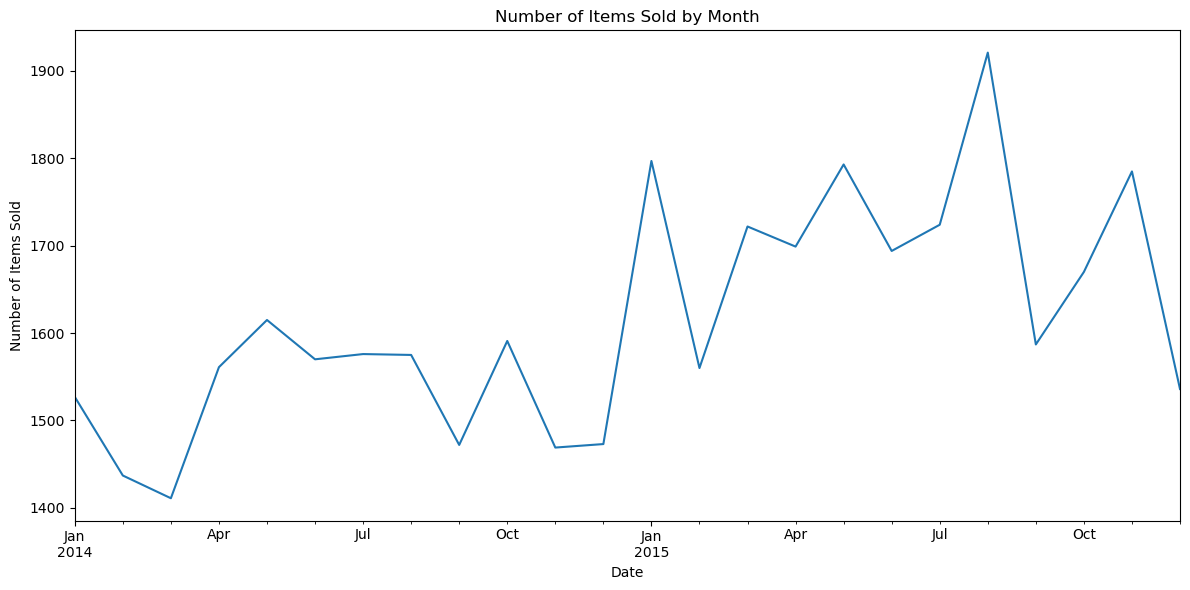

In [14]:
#Monthly sales
monthly_sales = data.resample('M', on='Date')['itemDescription'].count()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Number of Items Sold by Month')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.tight_layout()
plt.show()

In [15]:
# Daily Sales

In [16]:
#step 3. Apriori Implementation

#let's create transaction for each member
transactions = data.groupby('Member_number')['itemDescription'].apply(list).tolist()

#Applying Apriori algorithm
rules = apriori(transactions=transactions, 
                min_support=0.01, 
                min_confidence=0.1, 
                min_lift=2, 
                min_length=2)
results = list(rules)
results

[RelationRecord(items=frozenset({'whole milk', 'meat', 'domestic eggs'}), support=0.01026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat'}), items_add=frozenset({'whole milk', 'domestic eggs'}), confidence=0.16129032258064516, lift=2.2945608664939954), OrderedStatistic(items_base=frozenset({'whole milk', 'domestic eggs'}), items_add=frozenset({'meat'}), confidence=0.145985401459854, lift=2.2945608664939954), OrderedStatistic(items_base=frozenset({'whole milk', 'meat'}), items_add=frozenset({'domestic eggs'}), confidence=0.29411764705882354, lift=2.2089992066190636)]),
 RelationRecord(items=frozenset({'beef', 'rolls/buns', 'soda', 'other vegetables'}), support=0.01026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef', 'rolls/buns'}), items_add=frozenset({'other vegetables', 'soda'}), confidence=0.25316455696202533, lift=2.0389162046239147)]),
 RelationRecord(items=frozenset({'bottled water', 'sausage', 'yogurt', 'soda'}), suppo

In [17]:
#Let's make a Function to format results
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

# Format and display results
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame['Lift'] = pd.to_numeric(resultsinDataFrame['Lift'], errors='coerce')
print(resultsinDataFrame.nlargest(n=10, columns='Lift'))


      Left Hand Side     Right Hand Side   Support  Confidence      Lift
0               meat          whole milk  0.010262    0.161290  2.294561
11  other vegetables          rolls/buns  0.013597    0.146409  2.220629
6   other vegetables          rolls/buns  0.010518    0.200000  2.202260
9            sausage  whipped/sour cream  0.011031    0.103118  2.149476
3         whole milk    other vegetables  0.010775    0.154412  2.111920
2      bottled water              yogurt  0.010005    0.203125  2.083635
10     bottled water    other vegetables  0.010518    0.398058  2.079934
12  other vegetables          rolls/buns  0.010005    0.136842  2.075527
4            sausage          whole milk  0.010005    0.312000  2.071850
7   other vegetables           pip fruit  0.010775    0.116022  2.046399


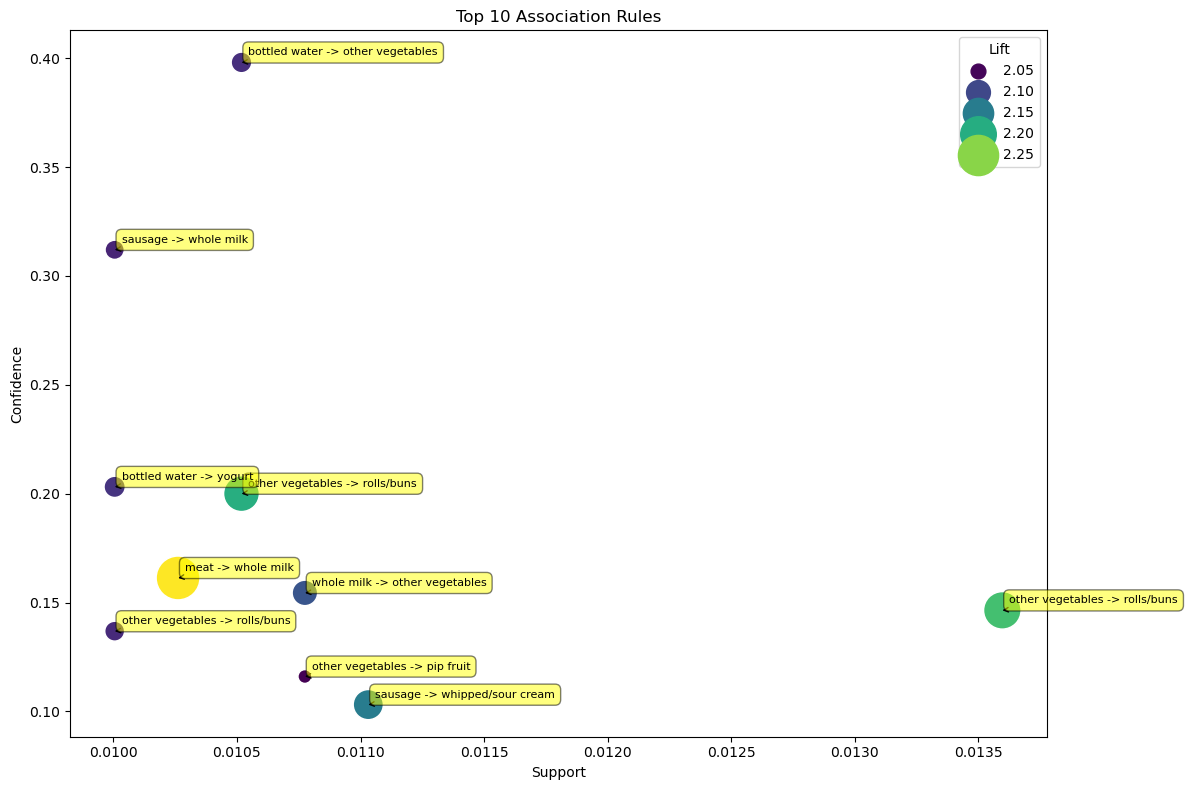

Top 10 Association Rules:
      Left Hand Side     Right Hand Side   Support  Confidence      Lift
0               meat          whole milk  0.010262    0.161290  2.294561
11  other vegetables          rolls/buns  0.013597    0.146409  2.220629
6   other vegetables          rolls/buns  0.010518    0.200000  2.202260
9            sausage  whipped/sour cream  0.011031    0.103118  2.149476
3         whole milk    other vegetables  0.010775    0.154412  2.111920
2      bottled water              yogurt  0.010005    0.203125  2.083635
10     bottled water    other vegetables  0.010518    0.398058  2.079934
12  other vegetables          rolls/buns  0.010005    0.136842  2.075527
4            sausage          whole milk  0.010005    0.312000  2.071850
7   other vegetables           pip fruit  0.010775    0.116022  2.046399


In [18]:
# Visualize top 10 rules
top_rules = resultsinDataFrame.nlargest(n=10, columns='Lift')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Support', y='Confidence', size='Lift', data=top_rules, sizes=(100, 1000), hue='Lift', palette='viridis')

for i, row in top_rules.iterrows():
    plt.annotate(f"{row['Left Hand Side']} -> {row['Right Hand Side']}", 
                 (row['Support'], row['Confidence']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, 
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title("Top 10 Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.tight_layout()
plt.show()

# Print the top 10 rules for detailed inspection
print("Top 10 Association Rules:")
print(top_rules)